<a href="https://colab.research.google.com/github/AguaClara/Textbook/blob/master/Flocs_Fractals_and_Forces/Colab/Floc_Attachment_Energies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
!pip install aguaclara
!pip install molmass

In [57]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import numpy as np
import matplotlib.pyplot as plt

$$D_{floc} = \frac{18\nu v_t}{D_{cp} g} \frac{\rho_{H_2O}}{\rho_{cp} - \rho_{H_2O}}$$

In [94]:

# bond energy and length for covalent O-H
E_bond = (464 * u.kJ/u.avogadro_number).to(u.aJ)
L_bond = 97 * u.pm
print("The covalent bond energy is ", E_bond)
F_bond = (E_bond/L_bond).to(u.nN)
print("The bond force of the covalent bond is ", F_bond)

@ac.list_handler()
def flocBrakingEnergy(G, D_floc, D_cp, rho_cp, TEMP):
  rho_water = ac.density_water(TEMP)
  rho_floc = rho_water + (rho_cp - rho_water) * D_cp/D_floc
  D_halfFloc = D_floc/np.sqrt(2)
  return (rho_floc * np.pi * D_halfFloc**5 * G**2 / 12).to(u.aJ)

G = 100 * u.Hz
D_floc = 35 * u.um 
D_cp = 5 * u.um 
rho_cp = 2650 * u.kg/u.m**3
TEMP = 5 * u.degC
print("The required braking energy for a 35 um floc is ", flocBrakingEnergy(G, D_floc, D_cp, rho_cp, TEMP))  

@ac.list_handler()
def bondBrakingEnergy(BondForce, BrakingDistance):
  return (BondForce * BrakingDistance).to(u.aJ)

@ac.list_handler()
def Dofvt(vt, D_cp, rho_cp, TEMP):
  nu_water = ac.viscosity_kinematic_water(TEMP)
  rho_water = ac.density_water(TEMP)
  return 18 * nu_water * vt /(D_cp * u.gravity) * rho_water/(rho_cp - rho_water)

@ac.list_handler()
def flocBrakingEnergyofvt(G, vt, D_cp, rho_cp, TEMP):
  D_floc = Dofvt(vt, D_cp, rho_cp, TEMP)
  return flocBrakingEnergy(G, D_floc, D_cp, rho_cp, TEMP)

brakingEnergyvc = (flocBrakingEnergyofvt(G, 0.12 * u.mm/u.s, D_cp, rho_cp, TEMP)).to(u.aJ)
print("The required floc braking energy given plate settler capture velocity is ",brakingEnergyvc )

The covalent bond energy is  0.7705 attojoule
The bond force of the covalent bond is  7.943 nanonewton
The required braking energy for a 35 um floc is  30.04 attojoule
The required floc braking energy given plate settler capture velocity is  57.71 attojoule


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Text(0.5, 0, 'Velocity Gradient $(Hz)$')

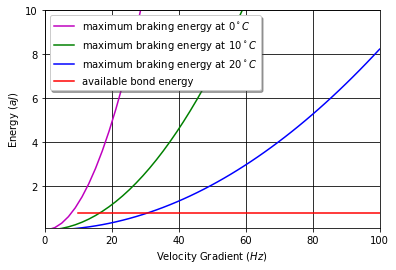

In [95]:
# floc braking energy as a function of velocity gradient
x = np.array([E_bond.magnitude,E_bond.magnitude])
Ggraph = np.linspace(1,100,50) * u.Hz
fig = plt.figure()
ax = plt.subplot(111)
ax.grid(b=True, which='major', color='black', linestyle='-')
ax.grid(b=True, which='minor', color='black', linestyle='-', alpha=0.2)
plate_vc = 0.12 * u.mm/u.s


line = ax.plot(Ggraph, (flocBrakingEnergyofvt(Ggraph, plate_vc, D_cp, rho_cp, 0 * u.degC)).to(u.aJ), 'm-', label=r"maximum braking energy at $0^\circ C$")
line = ax.plot(Ggraph, (flocBrakingEnergyofvt(Ggraph, plate_vc, D_cp, rho_cp, 10 * u.degC)).to(u.aJ), 'g-', label=r"maximum braking energy at $10^\circ C$")
line = ax.plot(Ggraph, (flocBrakingEnergyofvt(Ggraph, plate_vc, D_cp, rho_cp, 20 * u.degC)).to(u.aJ), 'b-', label=r"maximum braking energy at $20^\circ C$")
line = ax.plot(np.array([10,100])* u.Hz, np.array([E_bond.magnitude,E_bond.magnitude]) , 'r-', label=r"available bond energy")
plt.ylim([0.1, 10])
plt.xlim([0, 100])


ax.legend(fancybox=True, shadow=True)
plt.ylabel(r"Energy $\left(aJ\right)$")
plt.xlabel(r"Velocity Gradient $(Hz)$")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplo

Text(0.5, 0, 'Final floc diameter $(\\mu m)$')

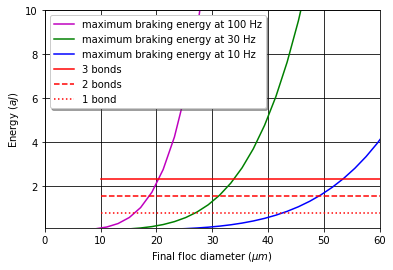

In [115]:
# floc braking energy as a function of floc diameter at G of 100 Hz
x = np.array([E_bond.magnitude,E_bond.magnitude])
Dgraph = np.linspace(1,100,50) * u.um
fig = plt.figure()
ax = plt.subplot(111)
ax.grid(b=True, which='major', color='black', linestyle='-')
ax.grid(b=True, which='minor', color='black', linestyle='-', alpha=0.2)
plate_vc = 0.12 * u.mm/u.s

line = ax.plot(Dgraph, (flocBrakingEnergy(100 * u.Hz, Dgraph, D_cp, rho_cp, 20 * u.degC)).to(u.aJ), 'm-', label=r"maximum braking energy at 100 Hz")
line = ax.plot(Dgraph, (flocBrakingEnergy(30 * u.Hz, Dgraph, D_cp, rho_cp, 20 * u.degC)).to(u.aJ), 'g-', label=r"maximum braking energy at 30 Hz")
line = ax.plot(Dgraph, (flocBrakingEnergy(10 * u.Hz, Dgraph, D_cp, rho_cp, 20 * u.degC)).to(u.aJ), 'b-', label=r"maximum braking energy at 10 Hz")
line = ax.plot(np.array([10,100])* u.Hz, np.array([E_bond.magnitude,E_bond.magnitude])*3 , 'r-', label=r"3 bonds")
line = ax.plot(np.array([10,100])* u.Hz, np.array([E_bond.magnitude,E_bond.magnitude])*2 , 'r-', linestyle='dashed', label=r"2 bonds")
line = ax.plot(np.array([10,100])* u.Hz, np.array([E_bond.magnitude,E_bond.magnitude])*1 , 'r-', linestyle='dotted', label=r"1 bond")
plt.ylim([0.1, 10])
plt.xlim([0, 60])


ax.legend(fancybox=True, shadow=True)
plt.ylabel(r"Energy $\left(aJ\right)$")
plt.xlabel(r"Final floc diameter $(\mu m)$")